Importing the Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

Loading the Dataset

In [ ]:
df=pd.read_csv("/Churn_Modelling.csv.csv") 
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Perform Univariate Analysis

There are three common ways to perform univariate analysis on one variable:

1. Summary statistics – Measures the center and spread of values.

2. Frequency table – Describes how often different values occur.

3. Charts – Used to visualize the distribution of values.

Summary statistics

  1.Mean

  2.Median
  
  3.Std

In [ ]:
df['EstimatedSalary'].mean()

100090.239881

In [ ]:
df['Balance'].median() 

97198.54000000001

In [ ]:
df['EstimatedSalary'].std() 

57510.49281769816

Frequency table

1.value_counts

In [ ]:
df['EstimatedSalary'].value_counts()

24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: EstimatedSalary, Length: 9999, dtype: int64

Create Charts

  1.Box plots

  2.Histogram

  3.Density curve

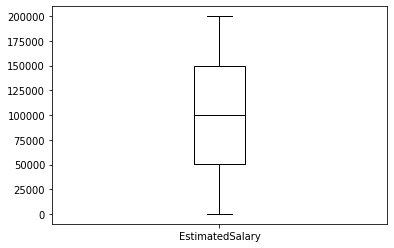

In [ ]:
import matplotlib.pyplot as plt

df.boxplot(column=['EstimatedSalary'], grid=False, color='black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfaa0863d0>]],
      dtype=object)

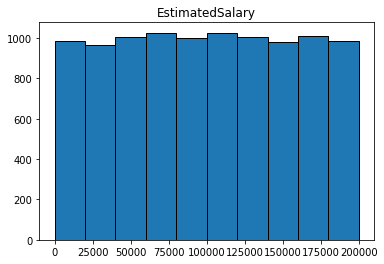

In [ ]:
import matplotlib.pyplot as plt

df.hist(column='EstimatedSalary', grid=False, edgecolor='black')

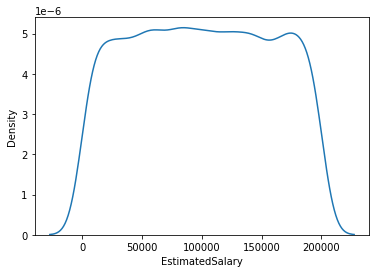

In [ ]:
import seaborn as sns

sns.kdeplot(df['EstimatedSalary'])

Bi - Variate Analysis

There are three common ways to perform bivariate analysis:

1. Scatterplots

2. Correlation Coefficients

3. Simple Linear Regression

Scatterplots

Text(0, 0.5, 'Balance')

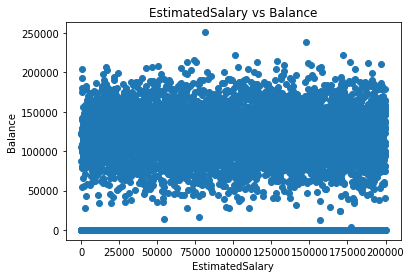

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.EstimatedSalary,df.Balance)
plt.title('EstimatedSalary vs Balance')
plt.xlabel('EstimatedSalary')
plt.ylabel('Balance')

Correlation Coefficients

In [ ]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


Simple Linear Regression

In [ ]:
import statsmodels.api as sm

#define response variable
y = df['CreditScore']

#define explanatory variable
x = df[['Balance']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            CreditScore   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3929
Date:                Wed, 28 Sep 2022   Prob (F-statistic):              0.531
Time:                        14:40:13   Log-Likelihood:                -59900.
No. Observations:               10000   AIC:                         1.198e+05
Df Residuals:                    9998   BIC:                         1.198e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        649.7861      1.529    424.948      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Multi - Variate Analysis

Profile Plot

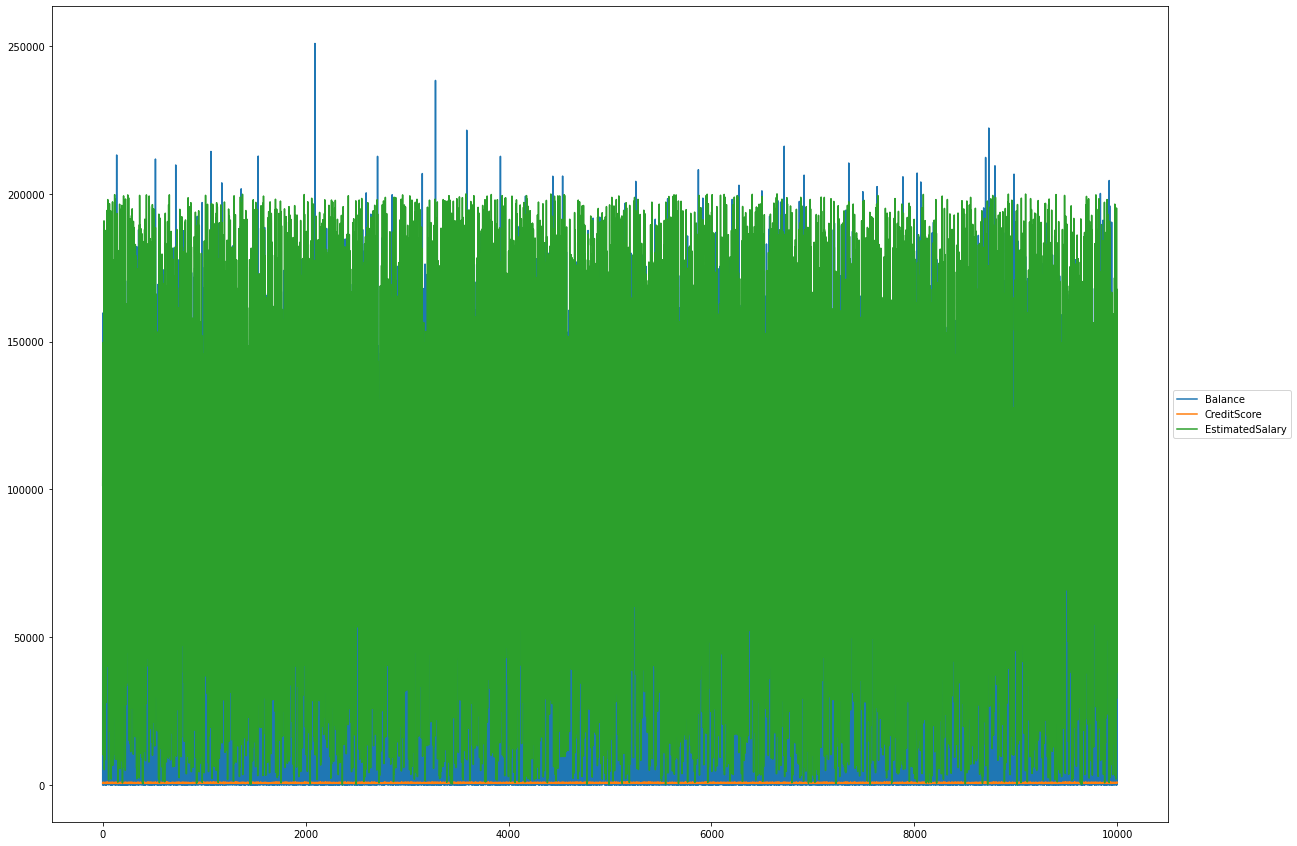

In [ ]:
ax = df[["Balance","CreditScore","EstimatedSalary"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Perform descriptive statistics on the dataset.

In [ ]:
df['EstimatedSalary'].mean()

100090.239881

In [ ]:
df['EstimatedSalary'].mode()

0    24924.92
dtype: float64

In [ ]:
df['EstimatedSalary'].std()

57510.49281769816

In [ ]:
df['EstimatedSalary'].skew()

0.0020853576615585162

Handle the Missing values

In [ ]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Find the outliers and replace the outliers

Outliers Identification

Visualization

       Boxplot

       Histogram 


Skewness


Interquartile Range


Standard Deviation

Visualization

       Boxplot

       Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


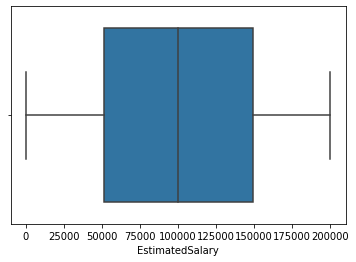

In [ ]:
sns.boxplot(df['EstimatedSalary'],data=df)

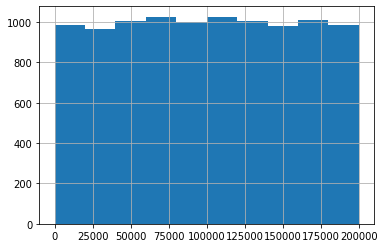

In [ ]:
df['EstimatedSalary'].hist()

Skewness

In [ ]:
print('skewness value of CreditScore: ',df['CreditScore'].skew())
print('skewness value of Balance: ',df['Balance'].skew())

skewness value of CreditScore:  -0.07160660820092675
skewness value of Balance:  -0.14110871094154384


Interquartile Range(IQR)

In [ ]:
df['EstimatedSalary'].quantile(0.25)
df['EstimatedSalary'].quantile(0.75)
Q3-Q1

98386.1375

Standard Deviation

In [ ]:
df['EstimatedSalary'].std()

57510.49281769816

Check for Categorical columns and perform encoding.

In [ ]:
pd.get_dummies(df, columns=["EstimatedSalary"]).head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,EstimatedSalary_199805.63,EstimatedSalary_199808.1,EstimatedSalary_199841.32,EstimatedSalary_199857.47,EstimatedSalary_199862.75,EstimatedSalary_199909.32,EstimatedSalary_199929.17,EstimatedSalary_199953.33,EstimatedSalary_199970.74,EstimatedSalary_199992.48
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,0,0,0,0,0,0,0,0,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,0,0,0,0,0,0,0,0,0,0


Split the data into dependent and independent variables.

In [ ]:
X = df.iloc[:, :-1].values
print(X)

In [ ]:
Y = df.iloc[:, -1].values
print(Y)

Scale the independent variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(EstimatedSalary)

Split the data into training and testing

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth = 2, random_state = 0)

In [ ]:
reg.fit(X_train, y_train)

In [ ]:
reg.predict(X_test[0:10])

In [ ]:
X_test.head(1)

In [ ]:
reg.predict(X_test.iloc[0].values.reshape(1,-1))